In [38]:
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model

from keras import Sequential
from keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout,BatchNormalization



In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

zsh:1: command not found: kaggle


In [4]:

dataset="/Users/mitpatel/Desktop/Everything/MY/DL/Projects/Face-mask/face-mask-dataset.zip"
with zipfile.ZipFile(dataset,"r") as data:
    data.extractall()
    print("The dataset is extracted")

The dataset is extracted


In [5]:
mask_files=os.listdir("/Users/mitpatel/Desktop/Everything/MY/DL/Projects/Face-mask/data/with_mask")

print(mask_files[0:5])
print(mask_files[:-5])

['with_mask_2140.jpg', 'with_mask_1449.jpg', 'with_mask_2626.jpg', 'with_mask_942.jpg', 'with_mask_3538.jpg']
['with_mask_2140.jpg', 'with_mask_1449.jpg', 'with_mask_2626.jpg', 'with_mask_942.jpg', 'with_mask_3538.jpg', 'with_mask_2632.jpg', 'with_mask_956.jpg', 'with_mask_2154.jpg', 'with_mask_1475.jpg', 'with_mask_3262.jpg', 'with_mask_3504.jpg', 'with_mask_1313.jpg', 'with_mask_1307.jpg', 'with_mask_3510.jpg', 'with_mask_3276.jpg', 'with_mask_2168.jpg', 'with_mask_1461.jpg', 'with_mask_2183.jpg', 'with_mask_981.jpg', 'with_mask_759.jpg', 'with_mask_2829.jpg', 'with_mask_995.jpg', 'with_mask_2197.jpg', 'with_mask_3289.jpg', 'with_mask_2801.jpg', 'with_mask_765.jpg', 'with_mask_2815.jpg', 'with_mask_771.jpg', 'with_mask_598.jpg', 'with_mask_2424.jpg', 'with_mask_40.jpg', 'with_mask_1893.jpg', 'with_mask_2342.jpg', 'with_mask_2356.jpg', 'with_mask_3048.jpg', 'with_mask_1887.jpg', 'with_mask_1139.jpg', 'with_mask_54.jpg', 'with_mask_2430.jpg', 'with_mask_1111.jpg', 'with_mask_3706.jpg',

In [6]:
without_mask_files=os.listdir("/Users/mitpatel/Desktop/Everything/MY/DL/Projects/Face-mask/data/without_mask")

print(without_mask_files[0:5])
print(without_mask_files[:-5])

['without_mask_3593.jpg', 'without_mask_2855.jpg', 'without_mask_1384.jpg', 'without_mask_1390.jpg', 'without_mask_2699.jpg']
['without_mask_3593.jpg', 'without_mask_2855.jpg', 'without_mask_1384.jpg', 'without_mask_1390.jpg', 'without_mask_2699.jpg', 'without_mask_3587.jpg', 'without_mask_2841.jpg', 'without_mask_2869.jpg', 'without_mask_293.jpg', 'without_mask_287.jpg', 'without_mask_1347.jpg', 'without_mask_3550.jpg', 'without_mask_2896.jpg', 'without_mask_2128.jpg', 'without_mask_3236.jpg', 'without_mask_1421.jpg', 'without_mask_1435.jpg', 'without_mask_3222.jpg', 'without_mask_3544.jpg', 'without_mask_278.jpg', 'without_mask_2882.jpg', 'without_mask_1353.jpg', 'without_mask_250.jpg', 'without_mask_2672.jpg', 'without_mask_2114.jpg', 'without_mask_536.jpg', 'without_mask_2100.jpg', 'without_mask_522.jpg', 'without_mask_1409.jpg', 'without_mask_3578.jpg', 'without_mask_244.jpg', 'without_mask_2666.jpg', 'without_mask_913.jpg', 'without_mask_1838.jpg', 'without_mask_1186.jpg', 'witho

In [7]:
print('Number of with mask images:', len(mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating Labels for the two class of Images

with mask --> 1

without mask --> 0

In [8]:
# create the labels

with_mask_labels=[1]*len(mask_files)
without_mask_labels=[0]*len(without_mask_files)

In [9]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [10]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [11]:
labels=with_mask_labels+without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


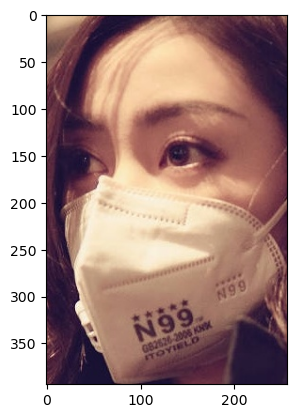

In [12]:
# displaying with mask image

img=mpimg.imread("/Users/mitpatel/Desktop/Everything/MY/DL/Projects/Face-mask/data/with_mask/with_mask_109.jpg")

plt.imshow(img)
plt.show()

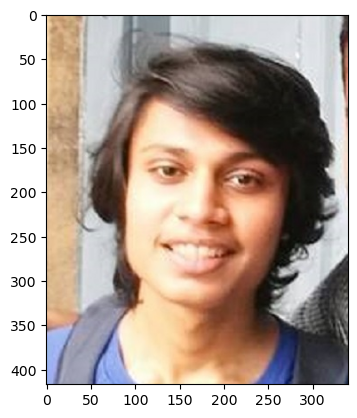

In [13]:
# displaying without mask image


img=mpimg.imread("/Users/mitpatel/Desktop/Everything/MY/DL/Projects/Face-mask/data/without_mask/without_mask_3583.jpg")

plt.imshow(img)
plt.show()



In [14]:
with_mask="/Users/mitpatel/Desktop/Everything/MY/DL/Projects/Face-mask/data/with_mask/"
data=[]

with_mask_files=os.listdir(with_mask)

for image_file in with_mask_files:
    path=os.path.join(with_mask+image_file)
    
    image=Image.open(path)
    image=image.resize((128,128))
    image=image.convert("RGB")
    image=np.array(image)
    data.append(image)

/Users/mitpatel/miniforge3/envs/ai_ml_gpu/lib/python3.12/site-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [15]:
without_mask="/Users/mitpatel/Desktop/Everything/MY/DL/Projects/Face-mask/data/without_mask/"

without_mask_files=os.listdir(without_mask)

for image_file in without_mask_files:
    path=os.path.join(without_mask+image_file)
    
    image=Image.open(path)
    image=image.resize((128,128))
    image=image.convert("RGB")
    image=np.array(image)
    data.append(image)

In [16]:
data

[array([[[226, 213, 197],
         [226, 213, 197],
         [226, 213, 197],
         ...,
         [214, 201, 182],
         [214, 201, 182],
         [214, 201, 182]],
 
        [[226, 213, 197],
         [226, 213, 197],
         [226, 213, 197],
         ...,
         [214, 201, 182],
         [214, 201, 182],
         [214, 201, 182]],
 
        [[226, 213, 197],
         [226, 213, 197],
         [226, 213, 197],
         ...,
         [214, 201, 182],
         [214, 201, 182],
         [214, 201, 182]],
 
        ...,
 
        [[235, 225, 216],
         [235, 225, 216],
         [235, 225, 216],
         ...,
         [219, 206, 189],
         [219, 206, 189],
         [219, 206, 189]],
 
        [[235, 225, 216],
         [235, 225, 216],
         [235, 225, 216],
         ...,
         [219, 206, 189],
         [219, 206, 189],
         [219, 206, 189]],
 
        [[235, 225, 216],
         [235, 225, 216],
         [235, 225, 216],
         ...,
         [217, 204, 187],
  

In [17]:
data[0:5]

[array([[[226, 213, 197],
         [226, 213, 197],
         [226, 213, 197],
         ...,
         [214, 201, 182],
         [214, 201, 182],
         [214, 201, 182]],
 
        [[226, 213, 197],
         [226, 213, 197],
         [226, 213, 197],
         ...,
         [214, 201, 182],
         [214, 201, 182],
         [214, 201, 182]],
 
        [[226, 213, 197],
         [226, 213, 197],
         [226, 213, 197],
         ...,
         [214, 201, 182],
         [214, 201, 182],
         [214, 201, 182]],
 
        ...,
 
        [[235, 225, 216],
         [235, 225, 216],
         [235, 225, 216],
         ...,
         [219, 206, 189],
         [219, 206, 189],
         [219, 206, 189]],
 
        [[235, 225, 216],
         [235, 225, 216],
         [235, 225, 216],
         ...,
         [219, 206, 189],
         [219, 206, 189],
         [219, 206, 189]],
 
        [[235, 225, 216],
         [235, 225, 216],
         [235, 225, 216],
         ...,
         [217, 204, 187],
  

In [18]:
len(data)

7553

In [19]:
type(data)

list

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
# converting image list and label list to numpy arrays

X=np.array(data)
y=np.array(labels)

In [23]:
X

array([[[[226, 213, 197],
         [226, 213, 197],
         [226, 213, 197],
         ...,
         [214, 201, 182],
         [214, 201, 182],
         [214, 201, 182]],

        [[226, 213, 197],
         [226, 213, 197],
         [226, 213, 197],
         ...,
         [214, 201, 182],
         [214, 201, 182],
         [214, 201, 182]],

        [[226, 213, 197],
         [226, 213, 197],
         [226, 213, 197],
         ...,
         [214, 201, 182],
         [214, 201, 182],
         [214, 201, 182]],

        ...,

        [[235, 225, 216],
         [235, 225, 216],
         [235, 225, 216],
         ...,
         [219, 206, 189],
         [219, 206, 189],
         [219, 206, 189]],

        [[235, 225, 216],
         [235, 225, 216],
         [235, 225, 216],
         ...,
         [219, 206, 189],
         [219, 206, 189],
         [219, 206, 189]],

        [[235, 225, 216],
         [235, 225, 216],
         [235, 225, 216],
         ...,
         [217, 204, 187],
        

In [24]:
y

array([1, 1, 1, ..., 0, 0, 0], shape=(7553,))

Train-Test-Split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [26]:
print(X_train.shape,X_test.shape)

(6042, 128, 128, 3) (1511, 128, 128, 3)


In [27]:
# scaling the data

X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [28]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(32,activation="relu"))
model.add(Dropout(0.35))

model.add(Dense(64,activation="relu"))
model.add(Dropout(0.35))

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.35))

model.add(Dense(2,activation="sigmoid"))

/Users/mitpatel/miniforge3/envs/ai_ml_gpu/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     1,843,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,873,314 (7.15 MB)

 Trainable params: 1,873,314 (7.15 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [31]:
history=model.fit(X_train_scaled,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 28s 125ms/step - accuracy: 0.7263 - loss: 0.5328 - val_accuracy: 0.8264 - val_loss: 0.3801
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 22s 129ms/step - accuracy: 0.8678 - loss: 0.3357 - val_accuracy: 0.8645 - val_loss: 0.3022
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 21s 122ms/step - accuracy: 0.8968 - loss: 0.2759 - val_accuracy: 0.8926 - val_loss: 0.2672
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 20s 118ms/step - accuracy: 0.8994 - loss: 0.2596 - val_accuracy: 0.8711 - val_loss: 0.2846
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 20s 118ms/step - accuracy: 0.9158 - loss: 0.2219 - val_accuracy: 0.8909 - val_loss: 0.2588


In [32]:
loss,accuracy=model.evaluate(X_test,y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9113 - loss: 11.6854


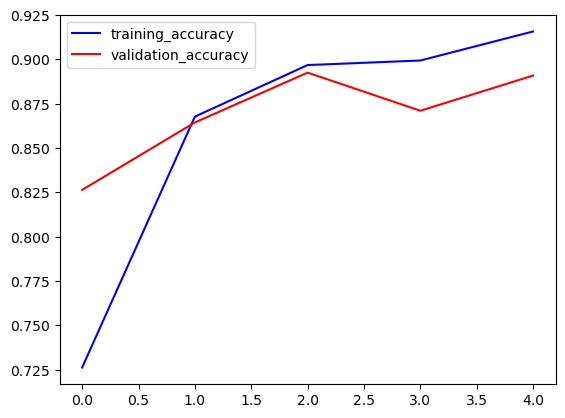

In [33]:
plt.plot(history.history["accuracy"],label="training_accuracy",color="blue")
plt.plot(history.history["val_accuracy"],label="validation_accuracy",color="red")
plt.legend()
plt.show()

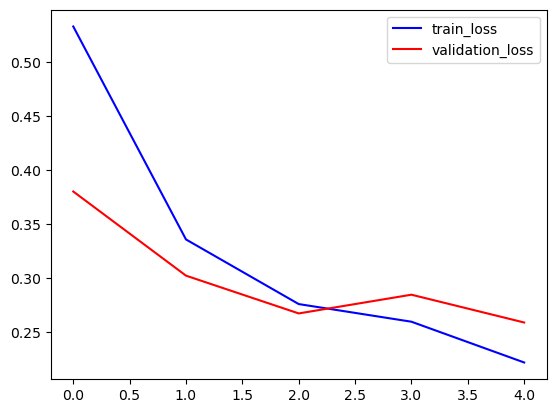

In [34]:
plt.plot(history.history["loss"],label="train_loss",color="blue")
plt.plot(history.history["val_loss"],label="validation_loss",color="red")
plt.legend()
plt.show()

In [45]:
model.save("face_mask_detector_model.h5")

In [47]:
model=load_model("face_mask_detector_model.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: Wearing Mask
Probabilities -> Not Wearing Mask=0.326, Wearing Mask=0.803


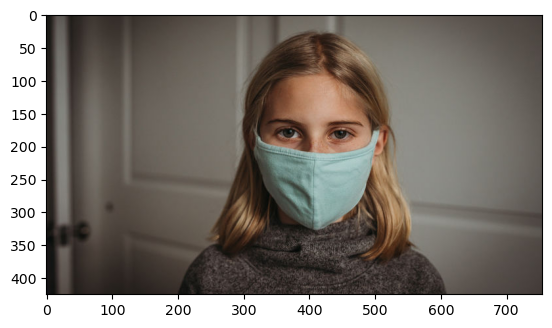

In [36]:
input_image_path=input("Path of the image to be predicted : ")

input_image=plt.imread(input_image_path)

plt.imshow(input_image)

input_image=cv2.resize(input_image,(128,128))

input_image=input_image/255

input_image=np.reshape(input_image,[1,128,128,3])


pred = model.predict(input_image)[0]

labels = {0: "Not Wearing Mask", 1: "Wearing Mask"}


cls = int(np.argmax(pred))

print(f"Prediction: {labels[cls]}")
print(f"Probabilities -> Not Wearing Mask={pred[0]:.3f}, Wearing Mask={pred[1]:.3f}")
